# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier



---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/shi/dev/auto/data/train.p'
validation_file= '/home/shi/dev/auto/data/valid.p'
testing_file = '/home/shi/dev/auto/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

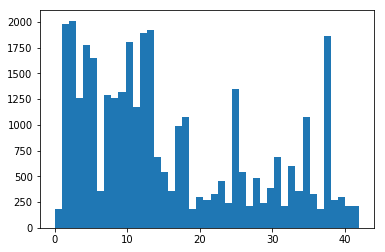

In [5]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
# Visualizations will be shown in the notebook.
%matplotlib inline

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
labels = set()
for l in y_valid:
    labels.add(l)
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

plt.hist(y_train, bins = n_classes)

In [33]:
print( X_train[0][1][1] )

[27 25 23]


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

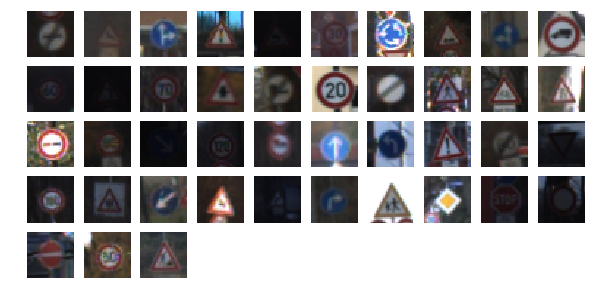

Brighten the dark pictures


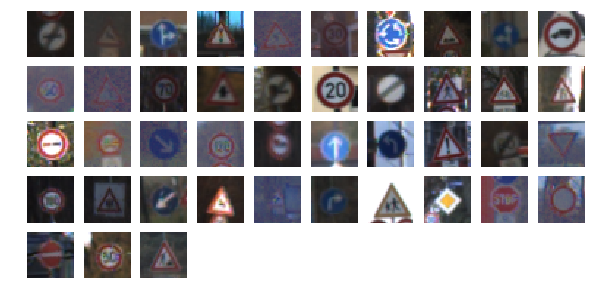

In [19]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.


def show_images(images, cmap=None, cols=10):
    print("len of images:", len(images))
    rows = math.ceil((len(images))/cols)
    
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        plt.axis('off')
        plt.imshow(image)

    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

def show_images2(images, cmap=None, cols=10):
    fig = plt.figure(figsize=(10, 10))
    rows = math.ceil((len(images))/cols)

    for i, image in enumerate(images):
        fig.add_subplot(10, cols, i+1)
        #plt.subplot(rows, cols, i+1)
        plt.axis('off')
        plt.imshow(image)

    # plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
    return fig
    
def brighten_image(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #convert it to hsv
    h, s, v = cv2.split(hsv)
    mean = np.mean(v)
    if (mean < 40):
        v += 80
    else:
        return img
            
    final_hsv = cv2.merge((h, s, v))

    return cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

def rotate_1(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 10.0*np.random.rand()
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def rotate_2(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 0 - 10.0*np.random.rand()
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def normalize_img(img):
    zeroimg = np.zeros((32,32,3))
    return cv2.normalize(img, zeroimg, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

to_show = []
to_show_brightened = []
collected = set()
to_show_labels = []
for i,img in enumerate(X_train):
    if not (y_train[i] in collected):
        collected.add(y_train[i])
        to_show_labels.append(y_train[i])
        to_show.append(X_train[i])
        to_show_brightened.append(brighten_image(X_train[i]))


figs_of_classes = show_images2(to_show)
print("Brighten the dark pictures")
brightened_figs = show_images2(to_show_brightened)

figs_of_classes.savefig('all_classes.png')
brightened_figs.savefig('brighten_classes.png')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
from sklearn.utils import shuffle
import cv2
import numpy as np


def PreprocessImg(ximgs):
    YSIZE = len(ximgs[0])
    XSIZE = len(ximgs[0][0])
    print("array length:", len(ximgs))

    P_train = [None for i in range(len(ximgs))]

    for i, img in enumerate(ximgs):
        zeroimg = np.zeros((32,32,3))
        img = brighten_image(img)
        normalized = cv2.normalize(img, zeroimg, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        P_train[i] = normalized
        
    return P_train

def AddRotateTrainingImgs(ximgs, xlabels):
    outImgs = [None for i in range(len(ximgs)*3)]
    outLabels = [0 for i in range(len(ximgs)*3)]
    for i, img in enumerate(ximgs):
        img = brighten_image(img)
        outImgs[3*i], outImgs[3*i+1], outImgs[3*i+2]  = normalize_img(img), normalize_img(rotate_1(img)), normalize_img(rotate_2(img))
        outLabels[3*i] = outLabels[3*i + 1] = outLabels[3*i + 2] = xlabels[i]
        
    return outImgs, outLabels
        
X_train, y_train = shuffle(X_train, y_train)

#P_train = PreprocessImg(X_train)
Q_train, y_train = AddRotateTrainingImgs(X_train, y_train)

#X_valid = PreprocessImg(X_valid)
#X_test = PreprocessImg(X_test)
### Feel free to use as many code cells as needed.

In [5]:
P_train = Q_train
print(len(P_train), P_train[2].shape)

104397 (32, 32, 3)


In [6]:
print(P_train[9][10][10])

[ 0.23376623  0.24025974  0.1883117 ]


### Model Architecture

In [5]:
### Define your architecture here.
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 64

from tensorflow.contrib.layers import flatten

def conv_layer(x, filter_w, in_d, out_d):
    mu = 0
    sigma = 0.1
    conv_w = tf.Variable(tf.truncated_normal(shape=(filter_w, filter_w, in_d, out_d), mean = mu, stddev = sigma))
    conv_b = tf.Variable(tf.zeros(out_d))
    conv_out   = tf.nn.conv2d(x, conv_w, strides=[1, 1, 1, 1], padding='VALID') + conv_b
    return conv_out

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    d_conv1 = 12
    d_conv2 = 32
    
    weight = tf.Variable(tf.truncated_normal([5, 5, 3, d_conv1], mean = mu, stddev = sigma))
    bias = tf.Variable(tf.zeros(d_conv1))
    layer1 = tf.nn.conv2d(x, weight, strides=[1, 1, 1, 1], padding='VALID')
    layer1 = tf.nn.bias_add(layer1, bias)

    # TODO: Activation.
    layer1 = tf.nn.relu(layer1)

    # TODO: Pooling. Input = 28x28x16. Output = 14x14x16.
    layer1 = tf.nn.max_pool(
        layer1,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID')
    # TODO: Layer 2: Convolutional. Output = 10x10x32.
    layer2 = conv_layer(layer1, 5, d_conv1, d_conv2)

    # TODO: Pooling. Input = 10x10x32. Output = 5x5x32.
    layer2 = tf.nn.max_pool(
        layer2,
        ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1],
        padding='VALID')

    # TODO: Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(layer2)
    conv2_flat_size = 5*5*d_conv2
    #wd1 = tf.Variable(tf.random_normal([5*5*32, 400]))
    #fc0 = tf.reshape(layer2, [-1, wd1.get_shape().as_list()[0]])
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(conv2_flat_size, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = n_classes(43).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Feel free to use as many code cells as needed.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

=== Training ===

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    X_train = Q_train
    num_examples = len(X_train)
    P_valid = PreprocessImg(X_valid)
    print("Training...")
    print()
    
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(P_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    

array length: 4410
Training...

EPOCH 1 ...
Validation Accuracy = 0.927

EPOCH 2 ...
Validation Accuracy = 0.937

EPOCH 3 ...
Validation Accuracy = 0.946

EPOCH 4 ...
Validation Accuracy = 0.940

EPOCH 5 ...
Validation Accuracy = 0.945

EPOCH 6 ...
Validation Accuracy = 0.951

EPOCH 7 ...
Validation Accuracy = 0.947

EPOCH 8 ...
Validation Accuracy = 0.956

EPOCH 9 ...
Validation Accuracy = 0.937

EPOCH 10 ...
Validation Accuracy = 0.941

EPOCH 11 ...
Validation Accuracy = 0.944

EPOCH 12 ...
Validation Accuracy = 0.944

EPOCH 13 ...
Validation Accuracy = 0.942

EPOCH 14 ...
Validation Accuracy = 0.950

EPOCH 15 ...
Validation Accuracy = 0.956

Model saved


---

##  Test a Model on Test Data

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [8]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    X_test = PreprocessImg(X_test)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
array length: 12630
Test Accuracy = 0.932


---

## Step 3: Test a Model on New Images

I went to google maps to browse street view at Munich city, got 10 images, since it is from street view, we can see the angle to look at the signs might not be right in front of them. After resizing all the pictures that were much larger than 32X32 lost many details of the pictures.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

len of images: 10


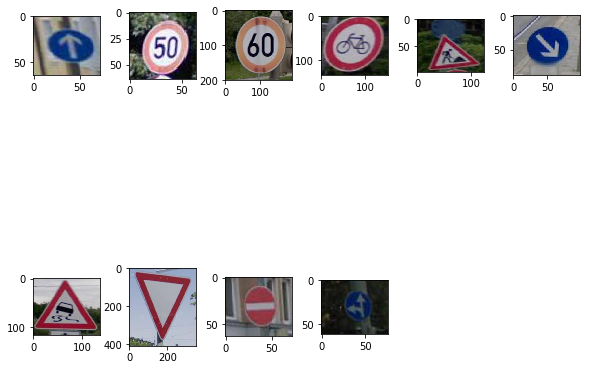

len of images: 10


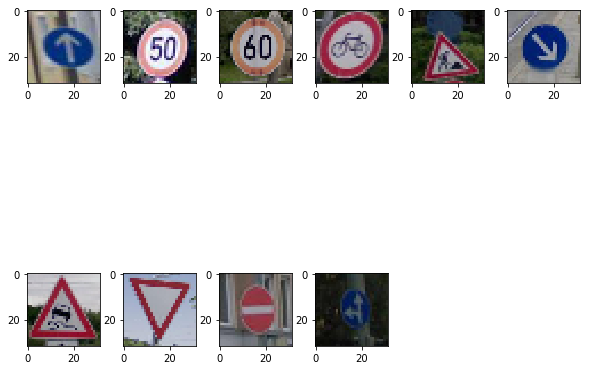

In [96]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob

test_images = [plt.imread(path) for path in glob.glob('data/*.jpg')]

resized_imgs = []
for img in test_images:
    resized_imgs.append(cv2.resize(img, (32, 32), interpolation = cv2.INTER_CUBIC))

show_images(test_images)
show_images(resized_imgs)

        

In [50]:
#load signnames table
import csv
print(test_images[5][10][10])
with open('./signnames.csv', newline='') as csvfile:
    csvread = csv.reader(csvfile, delimiter=',')
    next(csvread, None)
    signtable = {}
    for sign in csvread:
        signtable[int(sign[0])] = sign[1]
    
print (signtable)

[143 159 193]
{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet
[35  1  3  2 25 38 23 13 17 37]


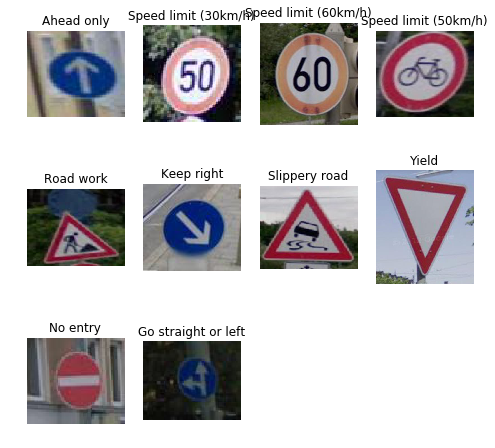

In [97]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


with tf.Session() as sess:
    saver.restore(sess, './lenet')
    predict_output = sess.run(logits, feed_dict={x: resized_imgs})
    #softmax = tf.nn.softmax(logits)
    #top5 = tf.nn.top_k(predict_output, k=5)
    #predicts = sess.run(tf.argmax(logits, 1), feed_dict={x: resized_imgs})

    top5 = sess.run(tf.nn.top_k(predict_output, k=5, sorted=True))
    predicts = sess.run(tf.argmax(predict_output, 1))
    
SIZE = len(resized_imgs)
#print("logits.shape={}, softmax.shape={}, top5.shape={}",predict_output.shape, softmax.shape, top5)

print(predicts)

plt.figure(figsize=(8, 8))
for i in range(SIZE):
    plt.subplot(3, 4, i+1)
    plt.imshow(test_images[i]) 

    #plt.tight_layout(pad=0, h_pad=0, w_pad=0)

    plt.title(signtable[predicts[i]])
    plt.axis('off')
plt.show()
   

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [98]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

for i in range(len(top5[0])):
    print('Image', i, 'probabilities:', top5[0][i], '\n and predicted classes:', top5[1][i])
 

Image 0 probabilities: [ 12380.75195312   4107.91162109    633.66223145     64.38895416
   -399.5456543 ] 
 and predicted classes: [35 34 41 42 33]
Image 1 probabilities: [ 8526.24609375  7575.15185547   400.25994873  -750.01275635 -1039.62841797] 
 and predicted classes: [ 1  2 38  6 31]
Image 2 probabilities: [ 8633.37304688  4273.015625    2314.578125    2091.63110352   182.98423767] 
 and predicted classes: [ 3  2 23  6  1]
Image 3 probabilities: [ 3555.50146484   645.40594482   428.12283325   -46.80718231   -64.77246094] 
 and predicted classes: [ 2 19 23 31 24]
Image 4 probabilities: [ 3769.99414062  1569.54626465  1486.37939453  -368.75384521  -879.48651123] 
 and predicted classes: [25 32 20  1 12]
Image 5 probabilities: [ 30300.3359375    7631.43896484   4355.85449219   1125.78894043
  -1354.58129883] 
 and predicted classes: [38 34 40 41 13]
Image 6 probabilities: [ 11769.66113281   9566.15820312   6416.703125     3409.06616211
   1960.49328613] 
 and predicted classes: [23 1

Among these 10 new images, 2 of them were classified wrongly: 'Speed limit 50' (image 1) was labeled as 'Speed limit 30', 'Bicycle Crossing' was recognized as 'Speed limit 50'. So it is 80% accuracy. 

For image 'Speed limit 50', the second possibility(7575) is very close to the first one(8526), while all other possibilities have much less possibility(less than 400), so seems the neural network is very close to get better answer for this one, maybe more training to help distinguish '5' and '3' could be helpful.

However, in training pictures, the 'Bicycle Crossing'(image 3) was triangle shaped sign, which is different than the image I got from google map, so this is understandable result that the trained neural network could not correctly recognize this image.

For the images that were not recognized correctly 2,4 we can see  :
Image 1 probabilities: [ 8526.24609375  7575.15185547   400.25994873  -750.01275635 -1039.62841797] 
 and predicted classes: [ 1  2 38  6 31]
 
Image 3 probabilities: [ 3555.50146484   645.40594482   428.12283325   -46.80718231   -64.77246094] 
 and predicted classes: [ 2 19 23 31 24]

### Project Writeup



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")